In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ship-data/my_shipdetection/dataset.csv
/kaggle/input/ship-data/my_shipdetection/subset_images/ee783cf9f.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/7c8d78c3f.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/290f37d66.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/6a91a5706.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/43fa8864a.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/30d3f7721.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/1f6c6ee44.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/b23c16f4e.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/84c7ff904.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/16bb16e1f.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/4ea891205.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/a7f83e6ff.jpg
/kaggle/input/ship-data/my_shipdetection/subset_images/9ea4637e5.jpg
/kaggle/input/ship-data/my_shipdetection/subset_im

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
import os
import numpy as np
import shutil
import tensorflow_hub as hub
import itertools
from six.moves import urllib
from os.path import join, exists
from tensorflow import keras
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from tensorflow.keras.applications import VGG16, DenseNet121
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from skimage import transform
from tqdm.notebook import tqdm_notebook
from enum import Enum

/tmp/ipykernel_257/1601242440.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [5]:
import pandas as pd
import cv2
import keras
import os
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
DIR = '/kaggle/input/ship-data' #Create directory
classes = [i for i in os.listdir(DIR) if '.' not in i]                     #Creating classes
classes

['my_shipdetection']

In [7]:
df = pd.read_csv('/kaggle/input/ship-data/my_shipdetection/dataset.csv')
image_dir = '/kaggle/input/ship-data/my_shipdetection/subset_images'
df

ImageId                                      EncodedPixels
0       b5b6373bb.jpg  47066 1 47833 4 48601 5 49368 8 50135 10 50903...
1       ab3f96f26.jpg  350060 1 350827 3 351594 5 352361 7 353127 10 ...
2       30ba7ccad.jpg                                                NaN
3       f07b6775f.jpg  496036 1 496802 4 497568 6 498335 8 499101 11 ...
4       290df4976.jpg  459139 1 459906 3 460673 5 461440 6 462206 9 4...
...               ...                                                ...
124273  3712bef8c.jpg                                                NaN
124274  1fa157e61.jpg                                                NaN
124275  cd519ee2d.jpg  174914 7 175682 14 176450 14 177218 14 177986 ...
124276  cd519ee2d.jpg  290557 1 291324 4 292092 5 292859 8 293626 10 ...
124277  0ed0b39bc.jpg                                                NaN

[124278 rows x 2 columns]

In [8]:
nan_rows = df[df['EncodedPixels'].isna()].sample(n=5000, random_state=42)

# NaN olmayan 5000 satırı seçin
non_nan_rows = df[df['EncodedPixels'].notna()].sample(n=5000, random_state=42)

# İki DataFrame'i birleştirin
df = pd.concat([nan_rows, non_nan_rows], ignore_index=True)

In [9]:
df

ImageId                                      EncodedPixels
0     8350e35b4.jpg                                                NaN
1     ad32ce180.jpg                                                NaN
2     e521f0974.jpg                                                NaN
3     ac0a40bc0.jpg                                                NaN
4     01ed87ecb.jpg                                                NaN
...             ...                                                ...
9995  bfd9ff1d1.jpg  496916 5 497684 9 498452 9 499220 9 499988 9 5...
9996  8a47e37e5.jpg  527686 3 528454 4 529221 7 529989 9 530756 11 ...
9997  740d32370.jpg  491045 3 491810 7 492576 9 493341 12 494106 15...
9998  6db3a0994.jpg  48632 2 49400 4 50167 7 50935 7 51702 7 52470 ...
9999  a4b8721f4.jpg  120408 1 121175 4 121943 5 122710 8 123478 9 1...

[10000 rows x 2 columns]

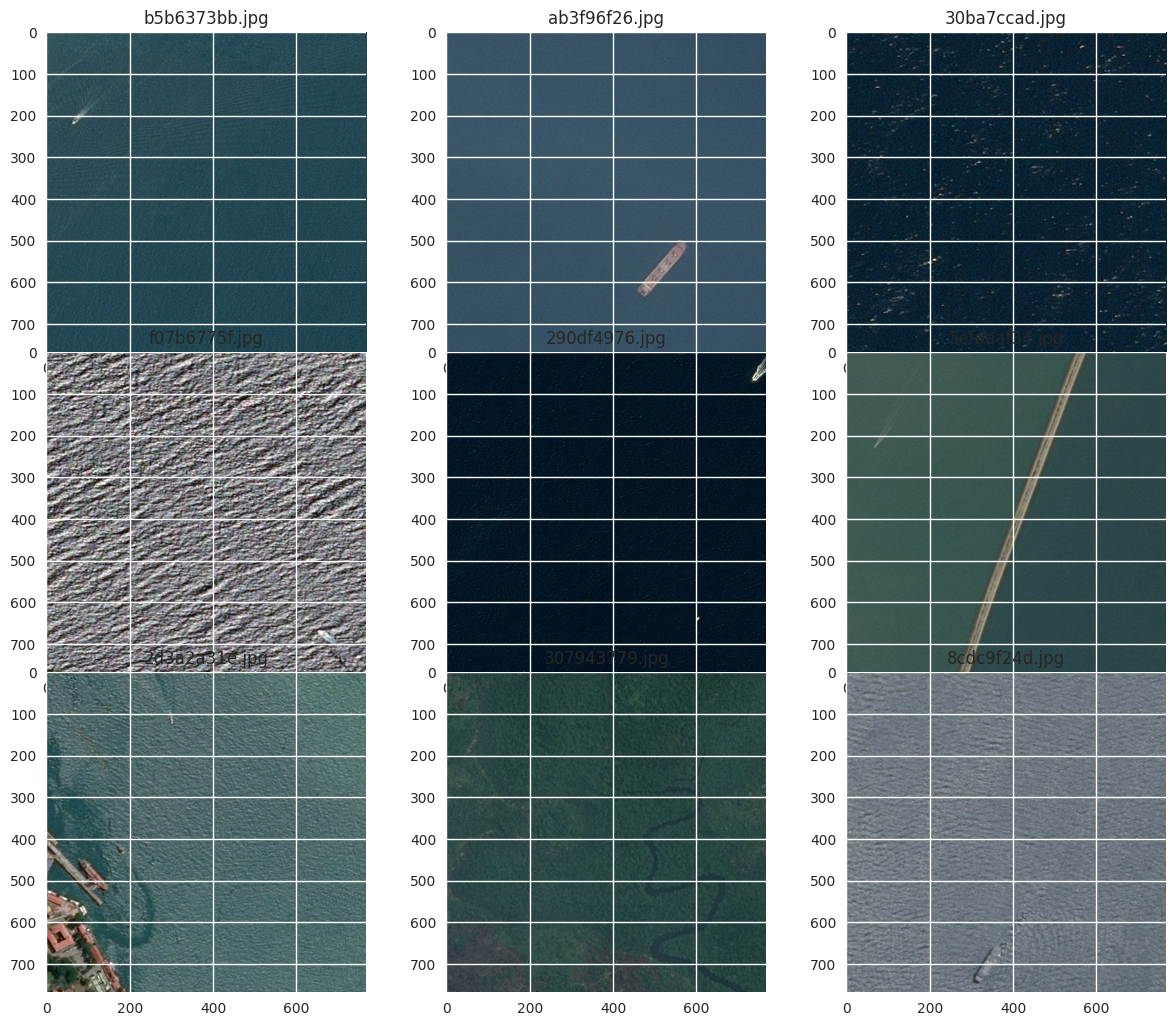

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# CSV dosyasını oku
df = pd.read_csv('/kaggle/input/ship-data/my_shipdetection/dataset.csv')

# Görüntülerin bulunduğu dizin
image_dir = '/kaggle/input/ship-data/my_shipdetection/subset_images'

# Görüntüleri görselleştirmek için ayarlama
plt.figure(figsize=(15, 12))
num_rows, num_cols = 3, 3

# Sadece ilk 9 görüntüyü göster
for i, unique_label in enumerate(df['ImageId'].unique()):
    if i >= num_rows * num_cols:  # 9 görüntü ile sınırlı
        break
    
    ax = plt.axes([
        0.1 + (i % num_cols) * 0.8 / num_cols,
        0.9 - (i // num_cols) * 0.8 / num_rows,
        0.8 / num_cols,
        0.8 / num_rows
    ])
    
    # Dosya yolunu oluştur
    image_path = f"{image_dir}/{unique_label}"

    # Görüntüyü yükle ve göster
    ax.imshow(plt.imread(image_path))
    ax.set_title(unique_label)

plt.show()

In [11]:
df['varyok'] = np.where(df['EncodedPixels'].isna(), 0, 1)

In [12]:
df['image_path'] = image_dir + '/' + df['ImageId']  # 'ImageId' yerine uygun kolon adını kullanın


In [13]:
df

ImageId                                      EncodedPixels  \
0       b5b6373bb.jpg  47066 1 47833 4 48601 5 49368 8 50135 10 50903...   
1       ab3f96f26.jpg  350060 1 350827 3 351594 5 352361 7 353127 10 ...   
2       30ba7ccad.jpg                                                NaN   
3       f07b6775f.jpg  496036 1 496802 4 497568 6 498335 8 499101 11 ...   
4       290df4976.jpg  459139 1 459906 3 460673 5 461440 6 462206 9 4...   
...               ...                                                ...   
124273  3712bef8c.jpg                                                NaN   
124274  1fa157e61.jpg                                                NaN   
124275  cd519ee2d.jpg  174914 7 175682 14 176450 14 177218 14 177986 ...   
124276  cd519ee2d.jpg  290557 1 291324 4 292092 5 292859 8 293626 10 ...   
124277  0ed0b39bc.jpg                                                NaN   

        varyok                                         image_path  
0            1  /kaggle/input/ship-data/my_shipdetection/subse...  
1            1  /kaggle/input/ship-data/my_shipdetection/subse...  
2            0  /kaggle/input/ship-data/my_shipdetection/subse...  
3            1  /kaggle/input/ship-data/my_shipdetection/subse...  
4            1  /kaggle/input/ship-data/my_shipdetection/subse...  
...        ...                                                ...  
124273       0  /kaggle/input/ship-data/my_shipdetection/subse...  
124274       0  /kaggle/input/ship-data/my_shipdetection/subse...  
124275       1  /kaggle/input/ship-data/my_shipdetection/subse...  
124276       1  /kaggle/input/ship-data/my_shipdetection/subse...  
124277       0  /kaggle/input/ship-data/my_shipdetection/subse...  

[124278 rows x 4 columns]

In [18]:
nan_rows = df[df['EncodedPixels'].isna()].sample(n=1000, random_state=42)

# NaN olmayan 5000 satırı seçin
non_nan_rows = df[df['EncodedPixels'].notna()].sample(n=1000, random_state=42)

# İki DataFrame'i birleştirin
df = pd.concat([nan_rows, non_nan_rows], ignore_index=True)

In [19]:
df

ImageId                                      EncodedPixels  \
0     f6edd0eee.jpg                                                NaN   
1     99f409ccf.jpg                                                NaN   
2     5f7f930e2.jpg                                                NaN   
3     087c9b315.jpg                                                NaN   
4     9811ee82c.jpg                                                NaN   
...             ...                                                ...   
1995  9d1f738b8.jpg  120163 1 120930 4 121698 6 122465 9 123233 11 ...   
1996  a9c027f2d.jpg  342625 2 343391 4 344157 7 344923 9 345689 12 ...   
1997  0debfe752.jpg  367706 2 368472 4 369240 5 370009 4 370777 5 3...   
1998  71fafa800.jpg  226984 5 227752 10 228520 10 229287 11 230055 ...   
1999  791e81a92.jpg  511083 1 511849 3 512616 5 513383 5 514152 3 5...   

      varyok                                         image_path  
0          0  /kaggle/input/ship-data/my_shipdetection/subse...  
1          0  /kaggle/input/ship-data/my_shipdetection/subse...  
2          0  /kaggle/input/ship-data/my_shipdetection/subse...  
3          0  /kaggle/input/ship-data/my_shipdetection/subse...  
4          0  /kaggle/input/ship-data/my_shipdetection/subse...  
...      ...                                                ...  
1995       1  /kaggle/input/ship-data/my_shipdetection/subse...  
1996       1  /kaggle/input/ship-data/my_shipdetection/subse...  
1997       1  /kaggle/input/ship-data/my_shipdetection/subse...  
1998       1  /kaggle/input/ship-data/my_shipdetection/subse...  
1999       1  /kaggle/input/ship-data/my_shipdetection/subse...  

[2000 rows x 4 columns]

In [20]:
x = []
for img_path in df['image_path']:
    if os.path.exists(img_path):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (64,64)) # Görüntüyü 32x32 boyutuna küçült
            img = img.astype(np.uint8) # Float64 yerine uint8 kullan
            img = img / 255.0 # Normalize et
            x.append(img)
    else:
        print(f"Görüntü dosyası bulunamadı: {img_path}")

x = np.array(x)
print(x.shape)

(2000, 64, 64, 3)


In [21]:
y=df['varyok']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [30]:
input_size = (64, 64, 3)
model=Sequential()
model.add(Input(shape=input_size))
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128))
model.add(Dense(1, activation='sigmoid'))  # Tek çıkışlı katman
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     1,843,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,862,849 (7.11 MB)

 Trainable params: 1,862,849 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.8369 - loss: 0.3618 - val_accuracy: 0.7075 - val_loss: 0.5898
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.8407 - loss: 0.3663 - val_accuracy: 0.7075 - val_loss: 0.6593
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.8417 - loss: 0.3507 - val_accuracy: 0.7325 - val_loss: 0.7018
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.8619 - loss: 0.3160 - val_accuracy: 0.7225 - val_loss: 0.6797
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.8670 - loss: 0.3084 - val_accuracy: 0.7075 - val_loss: 0.6561
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.8827 - loss: 0.2782 - val_accuracy: 0.7300 - val_loss: 0.7349
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 216ms/step - accuracy: 0.8929 - loss: 0.2580 - val_accuracy: 0.7100 - val_loss: 0.8331
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.9107 - loss: 0.2265 - val_accu

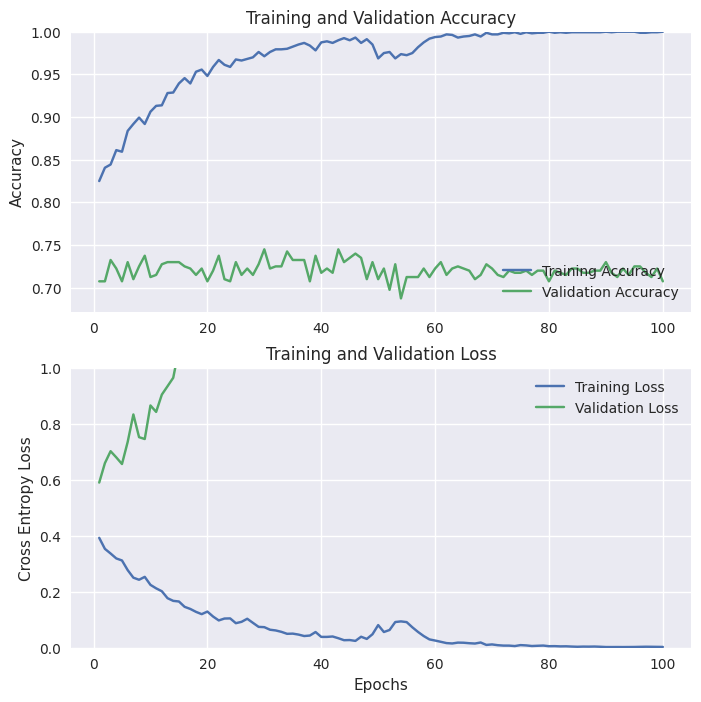

In [34]:
import matplotlib.pyplot as plt

# Retrieve the training and validation metrics from the history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the range of epochs
epochs_range = range(1, len(acc) + 1)

# Plot the training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()), 1])
plt.title('Training and Validation Accuracy')

# Plot the training and validation loss
plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy Loss')
plt.ylim([0, 1.0])
plt.xlabel('Epochs')
plt.title('Training and Validation Loss')

plt.show()